## PROBLEM STATEMENT

I decided to treat this as a classification problem by creating a new binary
variable affair (did the woman have at least one affair?) and trying to
predict the classification for each woman.
Dataset
The dataset I chose is the affairs dataset that comes with Statsmodels. It
was derived from a survey of women in 1974 by Redbook magazine, in
which married women were asked about their participation in extramarital
affairs. More information about the study is available in a 1978 paper from
the Journal of Political Economy.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from patsy import dmatrices
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [2]:
dta=sm.datasets.fair.load_pandas().data

In [3]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


### Description of Variables
The dataset contains 6366 observations of 9 variables: rate_marriage: woman's rating of her marriage (1 = very poor, 5 = very good)

age: woman's age

yrs_married: number of years married children: number of children

religious: woman's rating of how religious she is (1 = not religious, 4 =strongly religious)

educ: level of education (9 = grade school, 12 = high school, 14 =some college, 16 = college graduate, 17 = some graduate school, 20= advanced degree)

occupation: woman's occupation (1 = student, 2 = farming/semi-skilled/unskilled, 3 = "white collar", 4 = teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 =professional with advanced degree)

occupation_husb: husband's occupation (same coding as above)

affairs: time spent in extra-marital affairs

In [4]:
dta["affair"]=(dta["affairs"]>0).astype(int)
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In the given dataset, affairs column is the time spent on extra-marital affairs. So anything more than 0 means that a particular person was endulged in an affair. So we created a affair column which has 2 classes, 1= had a affair/affairs 0= No affair/affairs

In [5]:
dta.tail()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.0,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.0,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.0,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.0,0
6365,4.0,22.0,2.5,0.0,2.0,16.0,2.0,4.0,0.0,0


### Variable Identification

In [6]:
dta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affairs          6366 non-null   float64
 9   affair           6366 non-null   int32  
dtypes: float64(9), int32(1)
memory usage: 472.6 KB


### Univariate Continuous variable analysis

In [7]:
dta.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991,1.000000


Clearly there are no missing values. Let's check the distribution of the individual feature.

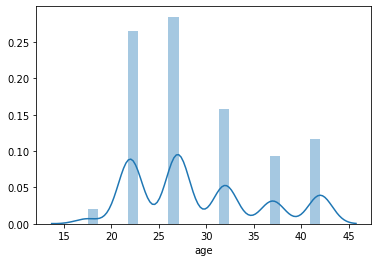

In [8]:
sns.distplot(dta["age"])

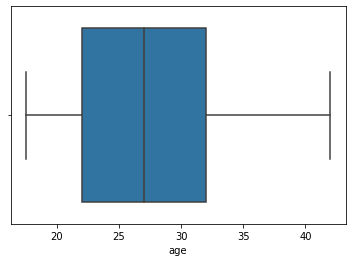

In [9]:
sns.boxplot(dta["age"])

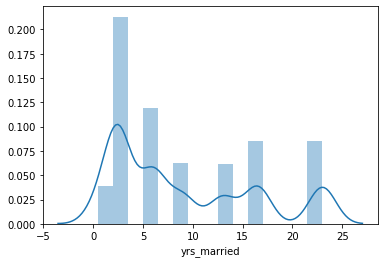

In [10]:
sns.distplot(dta["yrs_married"])

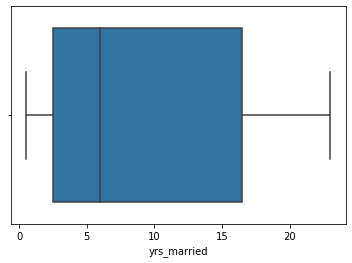

In [11]:
sns.boxplot(dta["yrs_married"])

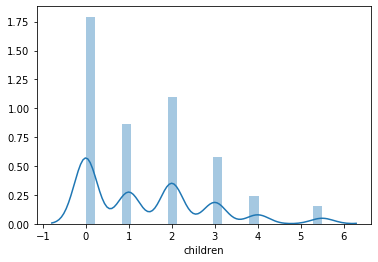

In [12]:
sns.distplot(dta["children"])

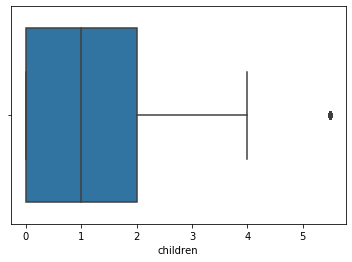

In [13]:
sns.boxplot(dta["children"])

In [14]:
dta=dta[dta["children"]<5]

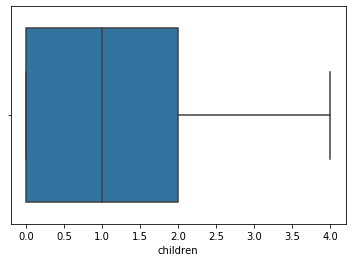

In [15]:
sns.boxplot(dta["children"])

### Univariate categorical variable analysis

In [16]:
dta["rate_marriage"].value_counts()

5.0    2603
4.0    2181
3.0     957
2.0     332
1.0      90
Name: rate_marriage, dtype: int64

In [17]:
#lets check the percentage of each category
dta["rate_marriage"].value_counts()/len(dta["rate_marriage"])

5.0    0.422359
4.0    0.353886
3.0    0.155282
2.0    0.053870
1.0    0.014603
Name: rate_marriage, dtype: float64

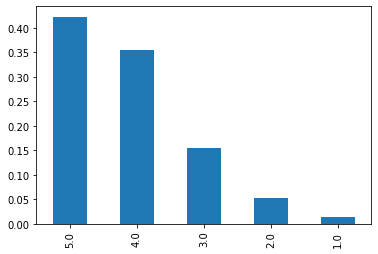

In [18]:
(dta["rate_marriage"].value_counts()/len(dta["rate_marriage"])).plot.bar()

More than 42% rated their marriage as 5 and around 35% as 4. This means that most of them were pretty happy with their married life.

In [19]:
dta["religious"].value_counts()

3.0    2340
2.0    2203
1.0    1008
4.0     612
Name: religious, dtype: int64

In [20]:
dta["religious"].value_counts()/len(dta["religious"])

3.0    0.379685
2.0    0.357456
1.0    0.163557
4.0    0.099302
Name: religious, dtype: float64

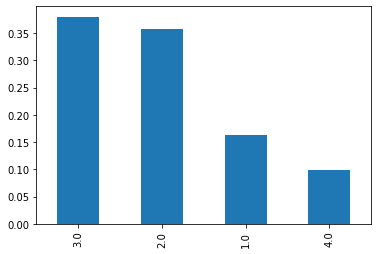

In [21]:
(dta["religious"].value_counts()/len(dta["religious"])).plot.bar()

Around 75% of women are moderately religious.

In [22]:
dta["educ"].value_counts()

14.0    2209
12.0    1990
16.0    1102
17.0     500
20.0     318
9.0       44
Name: educ, dtype: int64

In [23]:
dta["educ"].value_counts()/len(dta["educ"])

14.0    0.358429
12.0    0.322895
16.0    0.178809
17.0    0.081129
20.0    0.051598
9.0     0.007139
Name: educ, dtype: float64

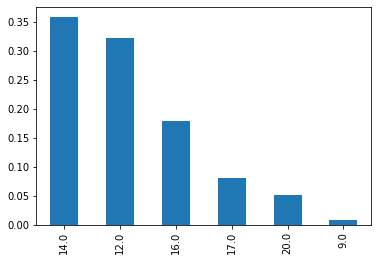

In [24]:
(dta["educ"].value_counts()/len(dta["educ"])).plot.bar()

In [25]:
(dta["occupation"].value_counts())/len(dta["occupation"])

3.0    0.440532
4.0    0.289307
2.0    0.131916
5.0    0.114230
6.0    0.017524
1.0    0.006490
Name: occupation, dtype: float64

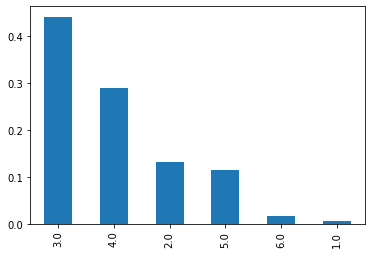

In [26]:
(dta["occupation"].value_counts()/len(dta["occupation"])).plot.bar()

In [27]:
dta["occupation_husb"].value_counts()/len(dta["occupation_husb"])

4.0    0.320461
5.0    0.277949
2.0    0.204608
6.0    0.082590
3.0    0.077235
1.0    0.037157
Name: occupation_husb, dtype: float64

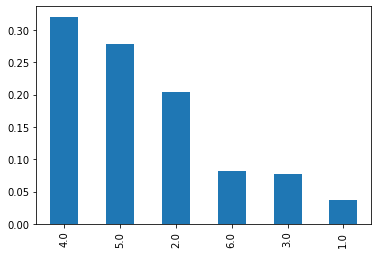

In [28]:
(dta["occupation_husb"].value_counts()/len(dta["occupation_husb"])).plot.bar()

In [29]:
dta["affair"].value_counts()/len(dta["affair"])

0    0.679701
1    0.320299
Name: affair, dtype: float64

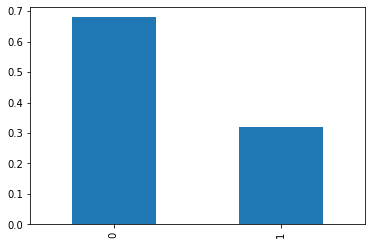

In [30]:
(dta["affair"].value_counts()/len(dta["affair"])).plot.bar()

Only around 33% of women were involved in extra-marital affairs.

### Bivariate analysis

#### continous-continous variables

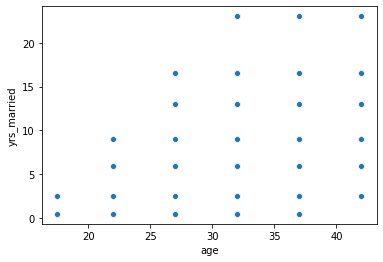

In [31]:
sns.scatterplot(dta["age"], dta["yrs_married"])

In [32]:
dta.corr()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,1.000000,-0.108929,-0.129023,-0.133739,0.076925,0.079634,0.033703,0.026906,-0.180058,-0.331900
age,-0.108929,1.000000,0.886977,0.652321,0.122619,0.039409,0.111733,0.162622,-0.085039,0.149972
yrs_married,-0.129023,0.886977,1.000000,0.763060,0.118202,-0.103741,0.043504,0.128779,-0.082373,0.209874
children,-0.133739,0.652321,0.763060,1.000000,0.124619,-0.139048,-0.013228,0.090550,-0.064833,0.174432
religious,0.076925,0.122619,0.118202,0.124619,1.000000,0.031300,0.031274,-0.002383,-0.124574,-0.131183
educ,0.079634,0.039409,-0.103741,-0.139048,0.031300,1.000000,0.383806,0.184378,-0.019210,-0.077990
occupation,0.033703,0.111733,0.043504,-0.013228,0.031274,0.383806,1.000000,0.202006,0.003129,0.028967
occupation_husb,0.026906,0.162622,0.128779,0.090550,-0.002383,0.184378,0.202006,1.000000,-0.014382,0.020025
affairs,-0.180058,-0.085039,-0.082373,-0.064833,-0.124574,-0.019210,0.003129,-0.014382,1.000000,0.467435
affair,-0.331900,0.149972,0.209874,0.174432,-0.131183,-0.077990,0.028967,0.020025,0.467435,1.000000


#### categorical-continuous

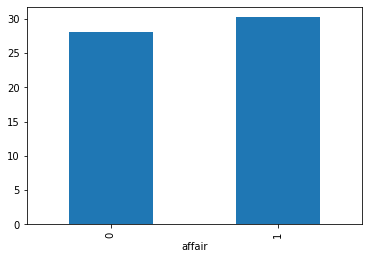

In [33]:
dta.groupby("affair")["age"].mean().plot.bar()

Let's check if there is a statistical difference between the mean age of the 2 groups. We need to do a t-test.

In [34]:
#importing ttest_ind 
from scipy.stats import ttest_ind

In [35]:
yes_affair=dta[dta["affair"]==1]
no_affair=dta[dta["affair"]==0]

In [36]:
ttest_ind(yes_affair["age"], no_affair["age"], nan_policy="omit")

Ttest_indResult(statistic=11.906264809290523, pvalue=2.4789610209169804e-32)

We can see that the pvalue<0.05 which means that there is a statistical difference between the mean age of the 2 groups.

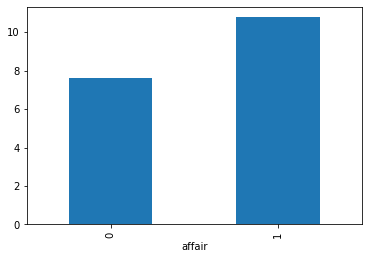

In [37]:
dta.groupby("affair")["yrs_married"].mean().plot.bar()

Let's drop the age column. Also let's drop the affairs column. 

In [38]:
dta.drop("affairs", axis=1, inplace=True)

In [39]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [40]:
# here the ~ sign is an = sign, and the features of our dataset
# are written as a formula to predict target column. The C() lets our 
# regression know that those variables are categorical.
# Ref: http://patsy.readthedocs.org/en/latest/formulas.html


# create a regression friendly dataframe using patsy's dmatrices function
y, X = dmatrices('affair ~ rate_marriage + age +yrs_married + children + religious + educ +C(occupation) + C(occupation_husb)', dta, return_type="dataframe")

In [41]:
X = X.rename(columns ={'C(occupation)[T.2.0]':'occ_2',
'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})

In [42]:
y=np.ravel(y)

In [43]:
X

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6361,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,32.0,13.0,2.0,3.0,17.0
6362,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,32.0,13.0,1.0,1.0,16.0
6363,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,22.0,2.5,0.0,2.0,14.0
6364,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,32.0,6.0,1.0,3.0,14.0


In [44]:
# sklearn output

# instantiate our model
model = LogisticRegression(fit_intercept = False, C = 1e9)
# lets fit our model
mdl = model.fit(X, y)
model.coef_



array([[ 2.12998837,  0.27563849,  0.64911396,  0.25473375,  0.88709868,
         0.29919297,  0.43809928,  0.58918042,  0.35664242,  0.42244335,
         0.38271722, -0.72442169, -0.04862376,  0.09244112,  0.08071887,
        -0.36799332,  0.03182697]])

In [45]:
# stats-model
logit = sm.Logit(y, X)
logit.fit().params

Optimization terminated successfully.
         Current function value: 0.539656
         Iterations 6


Intercept        2.994045
occ_2            0.351876
occ_3            0.665641
occ_4            0.408317
occ_5            1.027374
occ_6            1.049609
occ_husb_2       0.148257
occ_husb_3       0.261123
occ_husb_4       0.115588
occ_husb_5       0.164524
occ_husb_6       0.155258
rate_marriage   -0.714672
age             -0.059163
yrs_married      0.104010
children         0.061883
religious       -0.383272
educ            -0.001727
dtype: float64

In [46]:
#Let's split our data and try other ways to train the dataset
x_train, x_test, y_train, y_test=train_test_split(X,y, test_size=0.25, random_state=1)

In [47]:
#Let's use logisticRegression again on the training dataset
clf = LogisticRegression()
model = clf.fit(x_train, y_train)

print ("Training score:%s" % model.score(x_train,y_train))
print ("Cross val score:%s" % cross_val_score(clf,x_train, y_train,scoring='accuracy',cv=5).mean())

Training score:0.726308957161402
Cross val score:0.7219796419796419


In [48]:
#To make predictions with the test dataset
predicted=model.predict(x_test)
print ("predicted:%s\n" % predicted[:5])    
print('intercept', model.intercept_)
print(pd.DataFrame(np.transpose(model.coef_),x_train.columns))

predicted:[0. 0. 0. 0. 0.]

intercept [1.59324834]
                      0
Intercept      1.539410
occ_2          0.176527
occ_3          0.390242
occ_4          0.105806
occ_5          0.768458
occ_6          0.312690
occ_husb_2     0.258134
occ_husb_3     0.410193
occ_husb_4     0.198722
occ_husb_5     0.320884
occ_husb_6     0.412121
rate_marriage -0.709566
age           -0.070823
yrs_married    0.116541
children       0.061555
religious     -0.387630
educ           0.014752


In [49]:
model.score(x_test, y_test)

0.7222582738481506

In [50]:
print ("Testing score:%s" % model.score(x_test, y_test))
print ("Cross val score:%s" % cross_val_score(clf,x_test, y_test,scoring='accuracy',cv=5).mean())

Testing score:0.7222582738481506
Cross val score:0.7164165931156223


We can see that the the training and the testing accuracy is both around 72% which means that the model did not overfit the data.